# Analysis for salmon trap data in the Dungenesss River from 2010
### Description of data:
Data is stored in MS Excel files with one sheet per year. For 2010, the counts for wild and hatchery fish are separate.


In [1]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen
from bs4 import BeautifulSoup
import io
import datetime
import matplotlib.dates as mdates

In [19]:
year = "2010"
# #read file in Windows
try:
    df_year = pd.read_excel(
   io="C:/Users/maria/OneDrive/Documents/data/pied_piper/Dungeness smolt trap 2005 - 2014.xlsx",
   sheet_name =year,
    header = [0,1,2,3]
)
except PermissionError:
    print("Permission Error. Close the file, if it is open.")
    

df_year.head()
columns = list(df_year)
# print(columns)
df_year = df_year.iloc[:-1] #remove last line which has no data

list_names = []
for col in df_year.columns.values:
    
    check0 = str(col[0])
    check3 = str(col[3])
    if check3[0].isdigit():
        
        if (str(col[2])[0:7] == 'Unnamed'):
            list_names.append(str(col[0]) + '_' + str(col[1]))
        else:
            list_names.append(str(col[0]) + '_' + str(col[1]) + '_' + str(col[2]))
    elif check0 == 'Trapping Intervals':
        list_names.append(str(col[2]) + '_' + str(col[3]))
    
    
df_year.columns = list_names

#rename columns to be consistent with previous years
df_year = df_year.rename(columns={'Down_Down': "Date",
                        'Up_Time': "Up_time",
                        'Down_Time': "Down_time",          
                        'Up_Up': "Up_date",
                        'In_TimeIn': "In",
                        'Out_TimeOut': "Out"})
#make columns that are consistent with previous years
df_year['Up'] = df_year['Up_date'] + pd.to_timedelta(df_year["Up_time"].astype(str))
df_year['Down'] = df_year['Date'] + pd.to_timedelta(df_year["Down_time"].astype(str))
df_year['midpoint'] = df_year['Down'] + (df_year['Up'] - df_year['Down'])/2

#get rid of columns with Out !=0 and fill 0 instead of NANs
df_year= df_year[df_year['Out'] == 0]
df_year.fillna(0, inplace=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year)

C:\Users\maria\anaconda3\lib\site-packages\pandas\core\arrays\datetimelike.py:1187: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized
  warnings.warn(


,Date,Down_time,Up_date,Up_time,In,Out,Chinook0_Total,Chinook0_Hatchery,Chinook0_Hatchery_CWT,Chinook0_Wild,Chinook1_Total,Chinook1_Hatchery_CWT,Chinook1_Hatchery_Unmarked,Chinook1_Wild,Coho1_Total,Coho1_Hatchery_Ad-mark,Coho1_Hatchery_Ad-CWT,Coho1_Hatchery_CWT only,Coho1_Hatchery_unmark,Coho1_Wild_UC mark,Coho1_Wild_Unmark,Chum_Wild_Unmarked,Coho Fry_Wild_Unmarked,Pink_Unmark,Pink_Hatchery_ad-mark,Steelhead Smolts_Total,Steelhead Smolts_Hatchery_Ad-mark,Steelhead Smolts_Wild_Ad-CWT,Steelhead Smolts_Wild_UC mark,Steelhead Smolts_Wild_Unmark,Cutthroat_Wild_Smolt,Cutthroat_Wild_Parr,Trout Parr_Wild_Total,Trout Parr_Wild_Steelhead,Dolly\Bull_Wild_Smolt,Up,Down,midpoint
0,2010-02-08,16:30:00,2010-02-09,08:30:00,16.000000,0.0,3,0.0,0.0,3.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2,0.0,0,0.0,0.0,0.0,0.0,0,0.0,1,1.0,0.0,2010-02-09 08:30:00,2010-02-08 16:30:00,2010-02-09 00:30:00
1,2010-02-09,08:30:00,2010-02-09,17:45:00,9.250000,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,2010-02-09 17:45:00,2010-02-09 08:30:00,2010-02-09 13:07:30
2,2010-02-09,17:45:00,2010-02-10,07:38:00,13.883333,0.0,6,0.0,0.0,6.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,1,1.0,0.0,2010-02-10 07:38:00,2010-02-09 17:45:00,2010-02-10 00:41:30
4,2010-02-10,17:05:00,2010-02-11,07:25:00,14.333333,0.0,8,0.0,0.0,8.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,2010-02-11 07:25:00,2010-02-10 17:05:00,2010-02-11 00:15:00
6,2010-02-11,17:35:00,2010-02-12,07:20:00,13.750000,0.0,5,0.0,0.0,5.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,2010-02-12 07:20:00,2010-02-11 17:35:00,2010-02-12 00:27:30
7,2010-02-12,07:20:00,2010-02-12,17:45:00,10.416667,0.0,2,0.0,0.0,2.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,2010-02-12 17:45:00,2010-02-12 07:20:00,2010-02-12 12:32:30
8,2010-02-12,17:45:00,2010-02-13,07:45:00,14.000000,0.0,4,0.0,0.0,4.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,1,1.0,0.0,2010-02-13 07:45:00,2010-02-12 17:45:00,2010-02-13 00:45:00
9,2010-02-13,07:45:00,2010-02-13,17:50:00,10.083333,0.0,3,0.0,0.0,3.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,2010-02-13 17:50:00,2010-02-13 07:45:00,2010-02-13 12:47:30
10,2010-02-13,17:50:00,2010-02-14,07:30:00,13.666667,0.0,7,0.0,0.0,7.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,2010-02-14 07:30:00,2010-02-13 17:50:00,2010-02-14 00:40:00
11,2010-02-14,07:30:00,2010-02-14,17:50:00,10.333333,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,1,0.0,0.0,0.0,1.0,0,0.0,1,1.0,0.0,2010-02-14 17:50:00,2010-02-14 07:30:00,2010-02-14 12:40:00


In [36]:
#getting temperature data
#reading html data

url = "https://apps.ecology.wa.gov/ContinuousFlowAndWQ/StationData/Prod/18A050/18A050_" + year + "_WTM_FM.TXT"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# get text
text = soup.get_text()

url_flow = "https://apps.ecology.wa.gov/ContinuousFlowAndWQ/StationData/Prod/18A050/18A050_" + year+ "_DSG_FM.TXT"
html_flow = urlopen(url_flow).read()
soup_flow = BeautifulSoup(html_flow, features="html.parser")

# kill all script and style elements
for script in soup_flow(["script", "style"]):
    script.extract()    # rip it out


text_flow = soup_flow.get_text()


text = text[522:-50]
text_flow = text_flow[519:-109]

df = pd.read_csv(io.StringIO(text), sep='\s+', header = None, names = ["date", "time", "temp", "quality"])
df_flow = pd.read_csv(io.StringIO(text_flow), sep='\s+', header = None, names = ["date", "time", "flow", "quality"])


In [39]:
df['midpoint'] =  pd.to_datetime(df['date'] + ' ' + df['time'])

df_year_temp = pd.merge_asof(df_year.dropna(subset = ['midpoint']),df, on="midpoint",tolerance=pd.Timedelta(minutes = 15))

df_flow['midpoint'] =  pd.to_datetime(df_flow['date'] + ' ' + df_flow['time'])

df_year_temp_flow = pd.merge_asof(
    df_year_temp.dropna(subset = ['midpoint']),df_flow, on="midpoint",tolerance=pd.Timedelta(minutes = 15))

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year_temp_flow)

,Date,Down_time,Up_date,Up_time,In,Out,Chinook0_Total,Chinook0_Hatchery,Chinook0_Hatchery_CWT,Chinook0_Wild,Chinook1_Total,Chinook1_Hatchery_CWT,Chinook1_Hatchery_Unmarked,Chinook1_Wild,Coho1_Total,Coho1_Hatchery_Ad-mark,Coho1_Hatchery_Ad-CWT,Coho1_Hatchery_CWT only,Coho1_Hatchery_unmark,Coho1_Wild_UC mark,Coho1_Wild_Unmark,Chum_Wild_Unmarked,Coho Fry_Wild_Unmarked,Pink_Unmark,Pink_Hatchery_ad-mark,Steelhead Smolts_Total,Steelhead Smolts_Hatchery_Ad-mark,Steelhead Smolts_Wild_Ad-CWT,Steelhead Smolts_Wild_UC mark,Steelhead Smolts_Wild_Unmark,Cutthroat_Wild_Smolt,Cutthroat_Wild_Parr,Trout Parr_Wild_Total,Trout Parr_Wild_Steelhead,Dolly\Bull_Wild_Smolt,Up,Down,midpoint,date_x,time_x,temp,quality_x,date_y,time_y,flow,quality_y
0,2010-02-08,16:30:00,2010-02-09,08:30:00,16.000000,0.0,3,0.0,0.0,3.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2,0.0,0,0.0,0.0,0.0,0.0,0,0.0,1,1.0,0.0,2010-02-09 08:30:00,2010-02-08 16:30:00,2010-02-09 00:30:00,02/09/2010,00:30,4.7,140,02/09/2010,00:30,324.0,2
1,2010-02-09,08:30:00,2010-02-09,17:45:00,9.250000,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,2010-02-09 17:45:00,2010-02-09 08:30:00,2010-02-09 13:07:30,02/09/2010,13:00,5.0,140,02/09/2010,13:00,318.0,2
2,2010-02-09,17:45:00,2010-02-10,07:38:00,13.883333,0.0,6,0.0,0.0,6.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,1,1.0,0.0,2010-02-10 07:38:00,2010-02-09 17:45:00,2010-02-10 00:41:30,02/10/2010,00:30,4.0,140,02/10/2010,00:30,318.0,2
3,2010-02-10,17:05:00,2010-02-11,07:25:00,14.333333,0.0,8,0.0,0.0,8.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,2010-02-11 07:25:00,2010-02-10 17:05:00,2010-02-11 00:15:00,02/11/2010,00:15,4.5,140,02/11/2010,00:15,310.0,2
4,2010-02-11,17:35:00,2010-02-12,07:20:00,13.750000,0.0,5,0.0,0.0,5.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,2010-02-12 07:20:00,2010-02-11 17:35:00,2010-02-12 00:27:30,02/12/2010,00:15,5.4,140,02/12/2010,00:15,321.0,2
5,2010-02-12,07:20:00,2010-02-12,17:45:00,10.416667,0.0,2,0.0,0.0,2.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,2010-02-12 17:45:00,2010-02-12 07:20:00,2010-02-12 12:32:30,02/12/2010,12:30,5.9,140,02/12/2010,12:30,352.0,2
6,2010-02-12,17:45:00,2010-02-13,07:45:00,14.000000,0.0,4,0.0,0.0,4.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,1,1.0,0.0,2010-02-13 07:45:00,2010-02-12 17:45:00,2010-02-13 00:45:00,02/13/2010,00:45,5.1,140,02/13/2010,00:45,363.0,2
7,2010-02-13,07:45:00,2010-02-13,17:50:00,10.083333,0.0,3,0.0,0.0,3.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,2010-02-13 17:50:00,2010-02-13 07:45:00,2010-02-13 12:47:30,02/13/2010,12:45,5.3,140,02/13/2010,12:45,372.0,2
8,2010-02-13,17:50:00,2010-02-14,07:30:00,13.666667,0.0,7,0.0,0.0,7.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,2010-02-14 07:30:00,2010-02-13 17:50:00,2010-02-14 00:40:00,02/14/2010,00:30,5.8,140,02/14/2010,00:30,381.0,2
9,2010-02-14,07:30:00,2010-02-14,17:50:00,10.333333,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,1,0.0,0.0,0.0,1.0,0,0.0,1,1.0,0.0,2010-02-14 17:50:00,2010-02-14 07:30:00,2010-02-14 12:40:00,02/14/2010,12:30,6.4,140,02/14/2010,12:30,593.0,2


In [42]:
df_year_temp_flow = df_year_temp_flow.rename(columns={'Chinook0_Hatchery_CWT':'Chinook0_Hat1',
                                                      'Chinook0_Hatchery':'Chinook0_Hat',
                                                      'Chinook1_Hatchery_CWT':'Chinook1_Hat',
                                                      'Chinook1_Hatchery_Unmarked':'Chinook1_Hat1',
                                                      'Coho1_Hatchery_Ad-mark':'Coho1_Hat',
                                                      'Coho1_Hatchery_Ad-CWT':'Coho1_Hat1',
                                                      'Coho1_Hatchery_CWT only':'Coho1_Hat2',
                                                      'Coho1_Hatchery_unmark':'Coho1_Hat3',
                                                      'Coho1_Wild_UC mark':'Coho1_Wild',
                                                      'Coho1_Wild_Unmark':'Coho1_Wild1',
                                                      'Steelhead Smolts_Total':'Steelhead1_Total',
                                                      'Steelhead Smolts_Hatchery_Ad-mark':'Steelhead1_Hat',
                                                      'Steelhead Smolts_Wild_Ad-CWT':'Steelhead1_Wild',
                                                      'Steelhead Smolts_Wild_UC mark':'Steelhead1_Wild1',
                                                      'Steelhead Smolts_Wild_Unmark':'Steelhead1_Wild2'})
#aggregating data
groupedby_dates_year = df_year_temp_flow.groupby(by=["Date"]).agg({'In':'sum',
                                                                   'Out':'sum',
                                                                   'Chinook0_Total':'sum',
                                                                   'Chinook0_Hat':'sum',
                                                                   'Chinook0_Hat1':'sum',
                                                                   'Chinook0_Wild':'sum',
                                                                   'Chinook1_Total':'sum',
                                                                   'Chinook1_Hat':'sum',
                                                                   'Chinook1_Hat1':'sum',
                                                                   'Chinook1_Wild':'sum',
                                                                   'Coho1_Total':'sum',
                                                                   'Coho1_Hat':'sum',
                                                                   'Coho1_Hat1':'sum',
                                                                   'Coho1_Hat2':'sum',
                                                                   'Coho1_Hat3':'sum',
                                                                   'Coho1_Wild':'sum',
                                                                   'Coho1_Wild1':'sum',
                                                                   'Steelhead1_Total':'sum',
                                                                   'Steelhead1_Wild':'sum',
                                                                   'Steelhead1_Wild1':'sum',
                                                                   'Steelhead1_Wild2':'sum',
                                                                   'Steelhead1_Hat':'sum',
                                                                   'Trout Parr_Wild_Steelhead':'sum',
                                                                   'temp':'mean',
                                                                   'flow':'mean'})

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_dates_year)
    

,In,Out,Chinook0_Total,Chinook0_Hat,Chinook0_Hat1,Chinook0_Wild,Chinook1_Total,Chinook1_Hat,Chinook1_Hat1,Chinook1_Wild,Coho1_Total,Coho1_Hat,Coho1_Hat1,Coho1_Hat2,Coho1_Hat3,Coho1_Wild,Coho1_Wild1,Steelhead1_Total,Steelhead1_Wild,Steelhead1_Wild1,Steelhead1_Wild2,Steelhead1_Hat,Trout Parr_Wild_Steelhead,temp,flow
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2010-02-08,16.000000,0.0,3,0.0,0.0,3.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,4.700000,324.0
2010-02-09,23.133333,0.0,6,0.0,0.0,6.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,4.500000,318.0
2010-02-10,14.333333,0.0,8,0.0,0.0,8.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.500000,310.0
2010-02-11,13.750000,0.0,5,0.0,0.0,5.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,5.400000,321.0
2010-02-12,24.416667,0.0,6,0.0,0.0,6.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,5.500000,357.5
2010-02-13,23.750000,0.0,10,0.0,0.0,10.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,5.550000,376.5
2010-02-14,23.833333,0.0,2,0.0,0.0,2.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,1.0,6.000000,576.0
2010-02-15,25.000000,0.0,5,0.0,0.0,5.0,1,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,5.250000,488.0
2010-02-16,14.916667,0.0,4,0.0,0.0,4.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,5.200000,462.0


In [43]:
#calculate fish per hour
#chinook 0
groupedby_dates_year['chinook0_perhour'] = groupedby_dates_year['Chinook0_Total']/groupedby_dates_year['In']
groupedby_dates_year['chinook0_hatchery_perhour'] = (
    groupedby_dates_year['Chinook0_Hat']+groupedby_dates_year['Chinook0_Hat1'])/groupedby_dates_year['In']
groupedby_dates_year['chinook0_wild_perhour'] = groupedby_dates_year['Chinook0_Wild']/groupedby_dates_year['In']

#chinook 1
groupedby_dates_year['chinook1_perhour'] = groupedby_dates_year['Chinook1_Total']/groupedby_dates_year['In']
groupedby_dates_year['chinook1_hatchery_perhour'] = (
    groupedby_dates_year['Chinook1_Hat'] + groupedby_dates_year['Chinook1_Hat1'])/groupedby_dates_year['In']
groupedby_dates_year['chinook1_wild_perhour'] = groupedby_dates_year['Chinook1_Wild']/groupedby_dates_year['In']

#coho 1
groupedby_dates_year['coho1_perhour'] = groupedby_dates_year['Coho1_Total']/groupedby_dates_year['In']
groupedby_dates_year['coho1_hatchery_perhour'] = (
    groupedby_dates_year['Coho1_Hat'] + groupedby_dates_year['Coho1_Hat1'] + groupedby_dates_year['Coho1_Hat2'] + groupedby_dates_year['Coho1_Hat3'])/groupedby_dates_year['In']
groupedby_dates_year['coho1_wild_perhour'] = (groupedby_dates_year['Coho1_Wild']+groupedby_dates_year['Coho1_Wild1'])/groupedby_dates_year['In']

#steelhead
groupedby_dates_year['steelheadsmolt_perhour'] = groupedby_dates_year['Steelhead1_Total']/groupedby_dates_year['In']
groupedby_dates_year['steelheadsmolt_hatchery_perhour'] = groupedby_dates_year['Steelhead1_Hat']/groupedby_dates_year['In']
groupedby_dates_year['steelheadsmolt_wild_perhour'] = (
    groupedby_dates_year['Steelhead1_Wild']+groupedby_dates_year['Steelhead1_Wild1']+groupedby_dates_year['Steelhead1_Wild2'])/groupedby_dates_year['In']
groupedby_dates_year['steelheadsmolt_parr_perhour'] = groupedby_dates_year['Trout Parr_Wild_Steelhead']/groupedby_dates_year['In']


In [44]:
#function to plot fish per hour

def plot_fish_perhour(groupedby_dates_year, species = "chinook", year = "0", types=["hatchery", "wild", "total"]):
    
    fs = 18
    lw = 3
    transparency = 0.5
    plt.close('all') # always start by cleaning up
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    for fish_type in types:

        if fish_type == "total":
            x_string = species + year + "_" + "perhour"
            fish_color = "gray"
        if fish_type == "wild":  
            x_string = species + year +"_" + "wild" + "_" + "perhour"
            fish_color = "salmon"
        if fish_type == "hatchery":  
            x_string = species + year +"_" + "hatchery" + "_" + "perhour"
            fish_color = "seagreen"
        if fish_type == "parr":  
            x_string = species + year +"_" + "parr" + "_" + "perhour"
            fish_color = "orangered"


        
        ax1.plot(
            groupedby_dates_year.index, groupedby_dates_year[x_string], color = fish_color,
            label = fish_type, alpha = 0.5, linewidth = lw)
    plt.gcf().autofmt_xdate()
    plt.xlabel('Date', size = 0.9*fs)
    plt.ylabel(species + " " +year + "+" + ' counts per hour', size = 0.9*fs)
    ax1.tick_params(labelsize=.8*fs)
    ax1.set_title(species + " " +year + "+" + ' counts', loc='left', fontsize = fs*1.5)
    plt.legend(fontsize=fs, loc='upper right', title = '')

    plt.show()

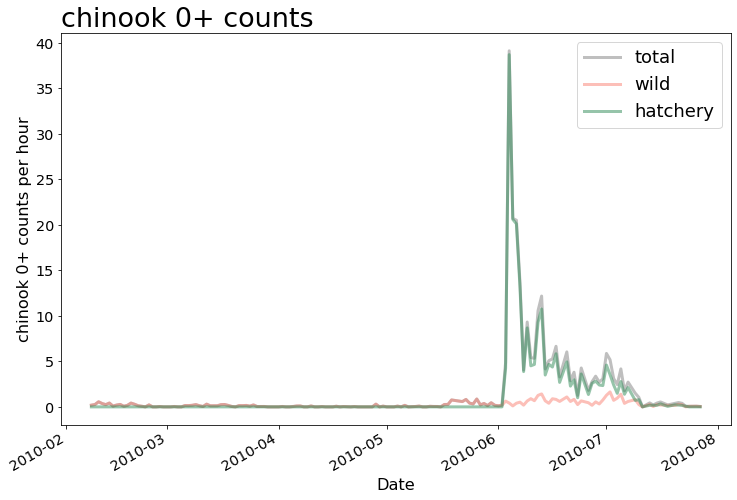

In [45]:
#chinook0
plot_fish_perhour(groupedby_dates_year,"chinook","0",["total","wild","hatchery"])

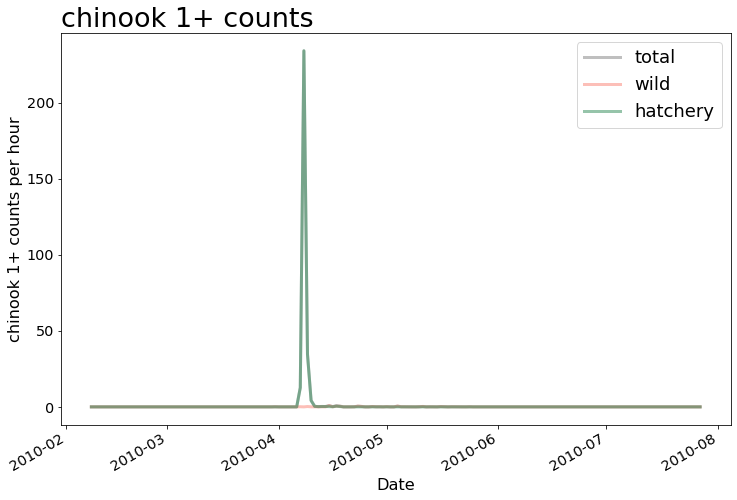

In [46]:
#chinook0
plot_fish_perhour(groupedby_dates_year,"chinook","1",["total","wild","hatchery"])

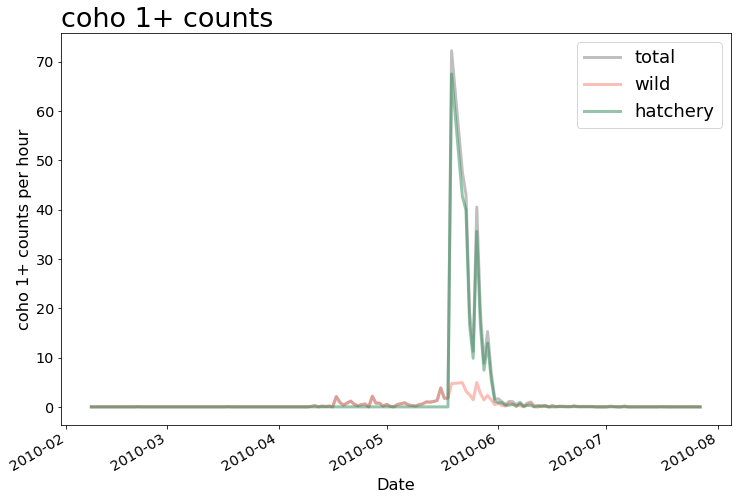

In [47]:
#coho1
plot_fish_perhour(groupedby_dates_year,"coho","1",["total","wild","hatchery"])

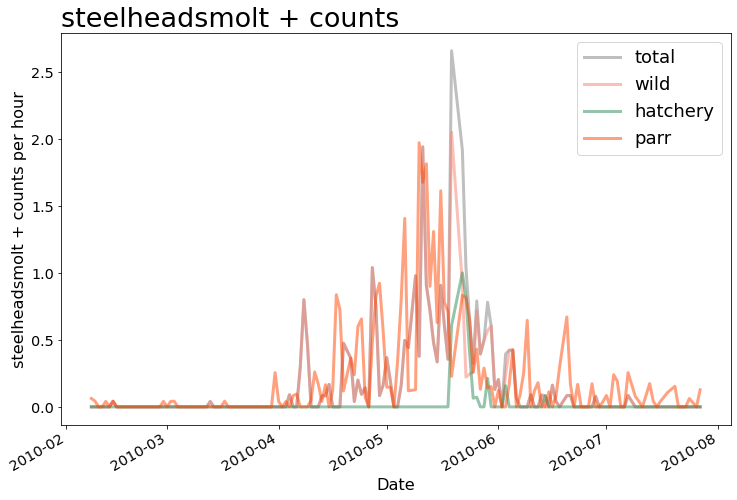

In [48]:
#steelhead
plot_fish_perhour(groupedby_dates_year,"steelheadsmolt","",["total","wild","hatchery","parr"])

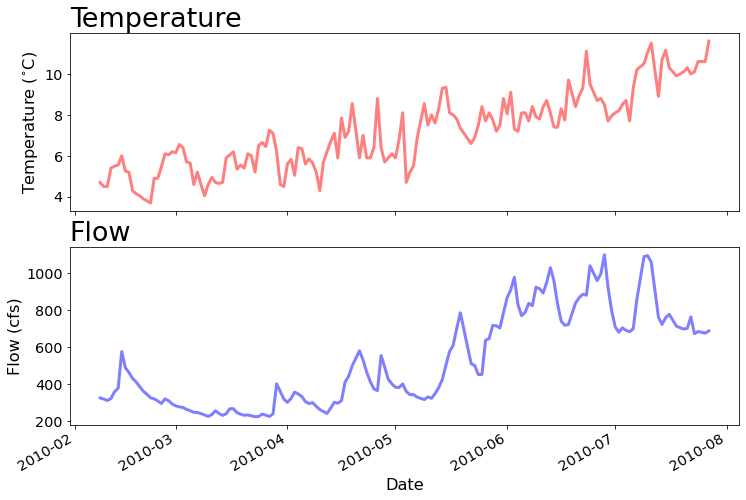

In [49]:
#plot temperature and flow
fs = 18
lw = 3
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
ax1.plot(
    groupedby_dates_year.index, groupedby_dates_year['temp'], color = 'red', 
    label = 'temperature', alpha = 0.5, linewidth = lw)
plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Temperature '+ r'($^{\circ}$C)', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.set_title('Temperature', loc='left', fontsize = fs*1.5)
#plt.legend(fontsize=fs, loc='upper right', title = '')


#flow
ax2 = fig.add_subplot(212)
ax2.plot(
    groupedby_dates_year.index, groupedby_dates_year['flow'], color = 'blue', 
    label = 'flow', alpha = 0.5, linewidth = lw)
plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Flow (cfs)', size = 0.9*fs)
ax2.tick_params(labelsize=.8*fs)
ax2.set_title('Flow', loc='left', fontsize = fs*1.5)
#plt.legend(fontsize=fs, loc='upper right', title = '')

plt.show()

In [50]:
groupedby_dates_year.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2010_dungeness.csv")  
df_year_temp_flow.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2010_dungeness_all.csv")

In [51]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year_temp_flow)
    

,Date,Down_time,Up_date,Up_time,In,Out,Chinook0_Total,Chinook0_Hat,Chinook0_Hat1,Chinook0_Wild,Chinook1_Total,Chinook1_Hat,Chinook1_Hat1,Chinook1_Wild,Coho1_Total,Coho1_Hat,Coho1_Hat1,Coho1_Hat2,Coho1_Hat3,Coho1_Wild,Coho1_Wild1,Chum_Wild_Unmarked,Coho Fry_Wild_Unmarked,Pink_Unmark,Pink_Hatchery_ad-mark,Steelhead1_Total,Steelhead1_Hat,Steelhead1_Wild,Steelhead1_Wild1,Steelhead1_Wild2,Cutthroat_Wild_Smolt,Cutthroat_Wild_Parr,Trout Parr_Wild_Total,Trout Parr_Wild_Steelhead,Dolly\Bull_Wild_Smolt,Up,Down,midpoint,date_x,time_x,temp,quality_x,date_y,time_y,flow,quality_y
0,2010-02-08,16:30:00,2010-02-09,08:30:00,16.000000,0.0,3,0.0,0.0,3.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2,0.0,0,0.0,0.0,0.0,0.0,0,0.0,1,1.0,0.0,2010-02-09 08:30:00,2010-02-08 16:30:00,2010-02-09 00:30:00,02/09/2010,00:30,4.7,140,02/09/2010,00:30,324.0,2
1,2010-02-09,08:30:00,2010-02-09,17:45:00,9.250000,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,2010-02-09 17:45:00,2010-02-09 08:30:00,2010-02-09 13:07:30,02/09/2010,13:00,5.0,140,02/09/2010,13:00,318.0,2
2,2010-02-09,17:45:00,2010-02-10,07:38:00,13.883333,0.0,6,0.0,0.0,6.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,1,1.0,0.0,2010-02-10 07:38:00,2010-02-09 17:45:00,2010-02-10 00:41:30,02/10/2010,00:30,4.0,140,02/10/2010,00:30,318.0,2
3,2010-02-10,17:05:00,2010-02-11,07:25:00,14.333333,0.0,8,0.0,0.0,8.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,2010-02-11 07:25:00,2010-02-10 17:05:00,2010-02-11 00:15:00,02/11/2010,00:15,4.5,140,02/11/2010,00:15,310.0,2
4,2010-02-11,17:35:00,2010-02-12,07:20:00,13.750000,0.0,5,0.0,0.0,5.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,2010-02-12 07:20:00,2010-02-11 17:35:00,2010-02-12 00:27:30,02/12/2010,00:15,5.4,140,02/12/2010,00:15,321.0,2
5,2010-02-12,07:20:00,2010-02-12,17:45:00,10.416667,0.0,2,0.0,0.0,2.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,2010-02-12 17:45:00,2010-02-12 07:20:00,2010-02-12 12:32:30,02/12/2010,12:30,5.9,140,02/12/2010,12:30,352.0,2
6,2010-02-12,17:45:00,2010-02-13,07:45:00,14.000000,0.0,4,0.0,0.0,4.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,1,1.0,0.0,2010-02-13 07:45:00,2010-02-12 17:45:00,2010-02-13 00:45:00,02/13/2010,00:45,5.1,140,02/13/2010,00:45,363.0,2
7,2010-02-13,07:45:00,2010-02-13,17:50:00,10.083333,0.0,3,0.0,0.0,3.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,2010-02-13 17:50:00,2010-02-13 07:45:00,2010-02-13 12:47:30,02/13/2010,12:45,5.3,140,02/13/2010,12:45,372.0,2
8,2010-02-13,17:50:00,2010-02-14,07:30:00,13.666667,0.0,7,0.0,0.0,7.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,2010-02-14 07:30:00,2010-02-13 17:50:00,2010-02-14 00:40:00,02/14/2010,00:30,5.8,140,02/14/2010,00:30,381.0,2
9,2010-02-14,07:30:00,2010-02-14,17:50:00,10.333333,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,1,0.0,0.0,0.0,1.0,0,0.0,1,1.0,0.0,2010-02-14 17:50:00,2010-02-14 07:30:00,2010-02-14 12:40:00,02/14/2010,12:30,6.4,140,02/14/2010,12:30,593.0,2


In [52]:
df_midpoint = df_year_temp_flow.set_index('midpoint')

groupedby_time_year = df_midpoint.groupby(df_midpoint.index.floor('60T').time).sum()
# print(df_midpoint)

groupedby_time_year_subset = groupedby_time_year[['Chinook0_Hat',
                                                  'Chinook0_Hat1',
                                                  'Chinook0_Wild',
                                                  'Chinook1_Hat',
                                                  'Chinook1_Hat1',
                                                  'Chinook1_Wild',
                                                  'Coho1_Wild',
                                                  'Coho1_Wild1',
                                                  'Coho1_Hat',
                                                  'Coho1_Hat1',
                                                  'Coho1_Hat2',
                                                  'Coho1_Hat3',
                                                  'Steelhead1_Hat',
                                                  'Steelhead1_Wild',
                                                  'Steelhead1_Wild1',
                                                  'Steelhead1_Wild2',
                                                  'Trout Parr_Wild_Steelhead']].div(groupedby_time_year['In'],axis = 0)

groupedby_time_year_subset['Chinook0_Hat_all'] = (
    groupedby_time_year_subset['Chinook0_Hat']+groupedby_time_year_subset['Chinook0_Hat1'])

groupedby_time_year_subset['Chinook0_Hat_prop'] = groupedby_time_year_subset['Chinook0_Hat_all']/groupedby_time_year_subset['Chinook0_Hat_all'].sum()

groupedby_time_year_subset['Chinook0_Wild_prop'] = groupedby_time_year_subset['Chinook0_Wild']/groupedby_time_year_subset['Chinook0_Wild'].sum()



groupedby_time_year_subset['Chinook1_Hat_all'] = (
    groupedby_time_year_subset['Chinook1_Hat'])

groupedby_time_year_subset['Chinook1_Hat_prop'] = (
    groupedby_time_year_subset['Chinook1_Hat_all'])/groupedby_time_year_subset['Chinook1_Hat_all'].sum()

groupedby_time_year_subset['Chinook1_Wild_prop'] = groupedby_time_year_subset['Chinook1_Wild']/groupedby_time_year_subset['Chinook1_Wild'].sum()



groupedby_time_year_subset['Coho1_Wild_all'] = groupedby_time_year_subset['Coho1_Wild']+groupedby_time_year_subset['Coho1_Wild1']

groupedby_time_year_subset['Coho1_Wild_prop'] = groupedby_time_year_subset['Coho1_Wild_all']/groupedby_time_year_subset['Coho1_Wild_all'].sum()

groupedby_time_year_subset['Coho1_Hat_all'] = (
    groupedby_time_year_subset['Coho1_Hat']+groupedby_time_year_subset['Coho1_Hat1']+groupedby_time_year_subset['Coho1_Hat2']+groupedby_time_year_subset['Coho1_Hat3'])


groupedby_time_year_subset['Coho1_Hat_prop'] = groupedby_time_year_subset['Coho1_Hat_all']/groupedby_time_year_subset['Coho1_Hat_all'].sum()



groupedby_time_year_subset['Steelhead1_Wild_all'] = groupedby_time_year_subset['Steelhead1_Wild'] + groupedby_time_year_subset['Steelhead1_Wild1'] + groupedby_time_year_subset['Steelhead1_Wild2']

groupedby_time_year_subset['Steelhead1_Wild_prop'] = groupedby_time_year_subset['Steelhead1_Wild_all']/groupedby_time_year_subset['Steelhead1_Wild_all'].sum()

groupedby_time_year_subset['Steelhead1_Hat_prop'] = groupedby_time_year_subset['Steelhead1_Hat']/groupedby_time_year_subset['Steelhead1_Hat'].sum()

groupedby_time_year_subset['Steelhead1_Parr_prop'] = groupedby_time_year_subset['Trout Parr_Wild_Steelhead']/groupedby_time_year_subset['Trout Parr_Wild_Steelhead'].sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_time_year_subset)

,Chinook0_Hat,Chinook0_Hat1,Chinook0_Wild,Chinook1_Hat,Chinook1_Hat1,Chinook1_Wild,Coho1_Wild,Coho1_Wild1,Coho1_Hat,Coho1_Hat1,Coho1_Hat2,Coho1_Hat3,Steelhead1_Hat,Steelhead1_Wild,Steelhead1_Wild1,Steelhead1_Wild2,Trout Parr_Wild_Steelhead,Chinook0_Hat_all,Chinook0_Hat_prop,Chinook0_Wild_prop,Chinook1_Hat_all,Chinook1_Hat_prop,Chinook1_Wild_prop,Coho1_Wild_all,Coho1_Wild_prop,Coho1_Hat_all,Coho1_Hat_prop,Steelhead1_Wild_all,Steelhead1_Wild_prop,Steelhead1_Hat_prop,Steelhead1_Parr_prop
00:00:00,0.000000,0.201203,0.187900,0.197877,0.000000,0.013303,0.000000,0.054873,0.003326,0.000000,0.000000,0.000000,0.000000,0.0,0.001663,0.038245,0.074827,0.201203,0.012749,0.044498,0.197877,0.002055,0.015445,0.054873,0.012393,0.003326,0.000138,0.039908,0.009627,0.000000,0.054629
01:00:00,0.004751,1.323832,0.288203,0.741093,0.009501,0.034838,0.004751,0.413302,1.081552,0.034838,0.001584,0.079177,0.012668,0.0,0.009501,0.142518,0.251781,1.328583,0.084186,0.068251,0.741093,0.007697,0.040447,0.418052,0.094414,1.197150,0.049643,0.152019,0.036672,0.023344,0.183817
02:00:00,0.019416,2.110543,0.291243,0.031066,0.000000,0.058249,0.033008,0.741700,2.564883,0.085431,0.001942,0.207754,0.050482,0.0,0.038832,0.225228,0.384441,2.129959,0.134966,0.068971,0.031066,0.000323,0.067627,0.774707,0.174962,2.860009,0.118598,0.264061,0.063701,0.093025,0.280668
03:00:00,0.031250,4.921875,1.109375,0.000000,0.000000,0.015625,0.031250,1.000000,12.812500,0.843750,0.031250,0.000000,0.109375,0.0,0.000000,0.218750,0.203125,4.953125,0.313857,0.262717,0.000000,0.000000,0.018141,1.031250,0.232900,13.687500,0.567590,0.218750,0.052770,0.201549,0.148295
04:00:00,0.000000,0.000000,0.000000,7.562500,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,7.562500,0.078542,0.072563,0.000000,0.000000,0.000000,0.000000,0.250000,0.060309,0.000000,0.000000
09:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10:00:00,0.000000,0.521739,0.130435,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.521739,0.033060,0.030889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11:00:00,0.000000,0.494845,0.061856,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.494845,0.031356,0.014648,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12:00:00,0.000000,0.000000,0.046222,0.000000,0.000000,0.000000,0.000000,0.021333,0.035556,0.000000,0.000000,0.003556,0.000000,0.0,0.000000,0.010667,0.003556,0.000000,0.000000,0.010946,0.000000,0.000000,0.000000,0.021333,0.004818,0.039111,0.001622,0.010667,0.002573,0.000000,0.002596
13:00:00,0.000000,0.055054,0.055054,0.004588,0.000000,0.000000,0.013764,0.027527,0.165163,0.004588,0.000000,0.013764,0.000000,0.0,0.013764,0.004588,0.013764,0.055054,0.003489,0.013038,0.004588,0.000048,0.000000,0.041291,0.009325,0.183514,0.007610,0.018351,0.004427,0.000000,0.010048


In [56]:
#function to plot fish count by hour
def fish_count_by_hour(species = "Chinook", year = "1"):
    fs = 18
    lw = 3
    transparency = 0.5
    plt.close('all') # always start by cleaning up
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    my_day = datetime.date(2014, 7, 15)
    x_dt = [ datetime.datetime.combine(my_day, t) for t in groupedby_time_year_subset.index ]
    if species == "Steelhead":
        width_bar=(x_dt[1]-x_dt[0])*0.3
        x_dt1 = [(t - (width_bar)) for t in x_dt]
        x_dt2 = [(t) for t in x_dt]
        x_dt3 = [(t + (width_bar)) for t in x_dt]

        
        plt.bar(
            x_dt1, groupedby_time_year_subset['Steelhead1_Hat_prop'], color = 'seagreen', 
            label = 'hatchery', alpha = 0.5, width=width_bar)
        plt.bar(
            x_dt2, groupedby_time_year_subset['Steelhead1_Wild_prop'], color = 'salmon', 
            label = 'wild', alpha = 0.5, width=width_bar)
        plt.bar(
            x_dt3, groupedby_time_year_subset['Steelhead1_Parr_prop'], color = 'orangered', 
            label = 'parr', alpha = 0.5, width=width_bar)
        # plt.gcf().autofmt_xdate()
        plt.xlabel('Time', size = 0.9*fs)
        plt.ylabel('Proportion of fish', size = 0.9*fs)
        ax1.tick_params(labelsize=.8*fs)

        plt.legend(fontsize=fs, loc='upper right', title = '')
        ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
        ax1.set_title('Proportion of Steelhead', loc='left', fontsize = fs*1.5)
        
    else:
        
        width_bar=(x_dt[1]-x_dt[0])*0.35
        x_dt1 = [(t - (width_bar/2)) for t in x_dt]
        x_dt2 = [(t + (width_bar/2)) for t in x_dt]

        if species == "Chinook":
            if year == "0":
                y_hat = groupedby_time_year_subset['Chinook0_Hat_prop']
                y_wild = y = groupedby_time_year_subset['Chinook0_Wild_prop']
            else:
                y_hat = groupedby_time_year_subset['Chinook1_Hat_prop']
                y_wild = y = groupedby_time_year_subset['Chinook1_Wild_prop']
        else:
            y_hat = groupedby_time_year_subset['Coho1_Hat_prop']
            y_wild = y = groupedby_time_year_subset['Coho1_Wild_prop']
                
        plt.bar(
            x_dt1, y_hat, color = 'seagreen', 
            label = 'hatchery', alpha = 0.5, width=width_bar)
        plt.bar(
            x_dt2, y_wild, color = 'salmon', 
            label = 'wild', alpha = 0.5, width=width_bar)
        # plt.gcf().autofmt_xdate()
        plt.xlabel('Time', size = 0.9*fs)
        plt.ylabel('Proportion of fish', size = 0.9*fs)
        ax1.tick_params(labelsize=.8*fs)

        plt.legend(fontsize=fs, loc='upper right', title = '')
        ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
        ax1.set_title('Proportion of ' + species + year +'+', loc='left', fontsize = fs*1.5)

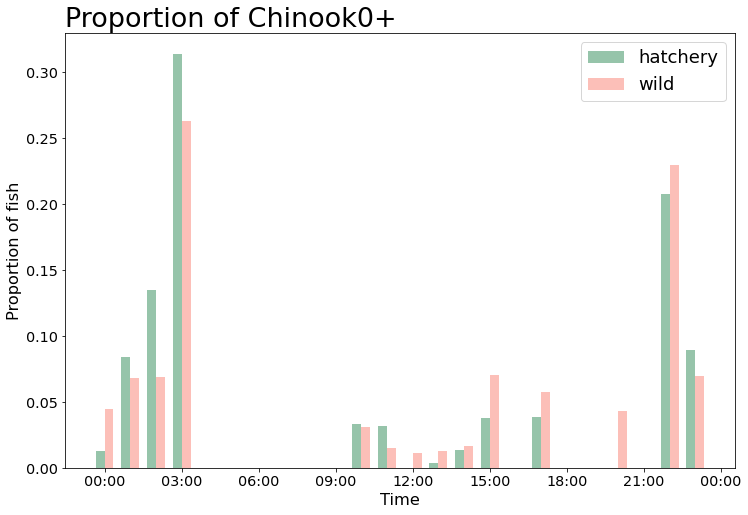

In [57]:
#chinook0
fish_count_by_hour("Chinook","0")

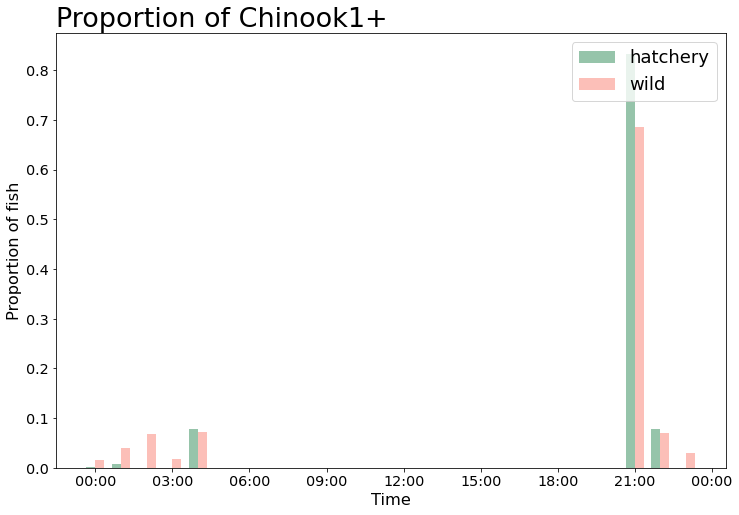

In [58]:
#chinook1
fish_count_by_hour("Chinook","1")

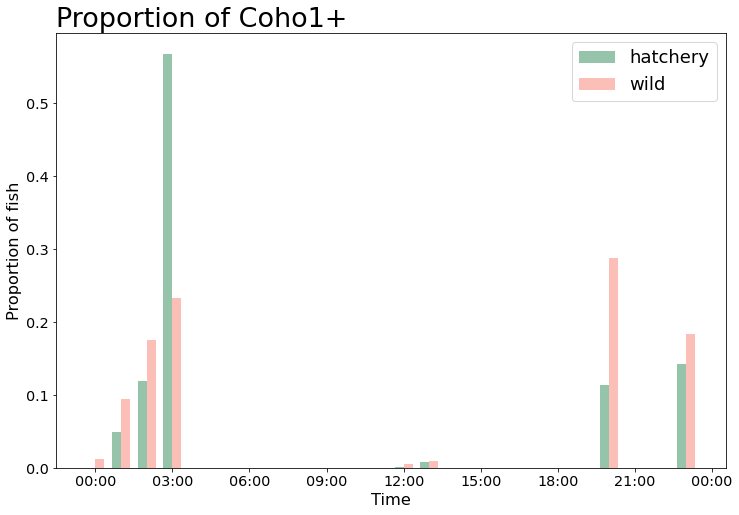

In [59]:
#coho1
fish_count_by_hour("Coho","1")

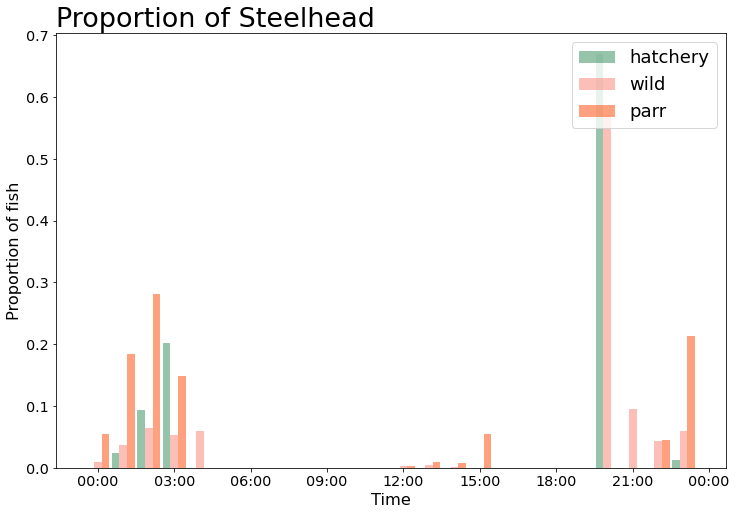

In [60]:
#coho1
fish_count_by_hour("Steelhead","1")

In [61]:
groupedby_time_year_subset.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2010_dungeness_time.csv")  
